In [1]:
import math
import random
import matplotlib.pyplot as plt

In [2]:
number = 120
iterations = 1000

lam1 = 0.031 #32 months
lam2 = 0.0165 #60 months
lam3 = 0.0176 #56 months
lam4 = 0.018 #55 months
lam5 = 0.0174 #57 months

def ERV(number, lam):
    ERV = []
    for i in range(number):
        result = lam * math.exp(-lam*i)
        ERV.append(result)
    return ERV

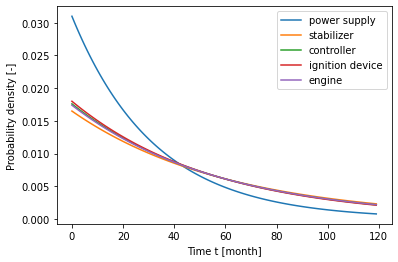

In [3]:
plt.plot(ERV(number, lam1))
plt.plot(ERV(number, lam2))
plt.plot(ERV(number, lam3))
plt.plot(ERV(number, lam4))
plt.plot(ERV(number, lam5))
plt.xlabel('Time t [month]')
plt.ylabel('Probability density [-]')
plt.legend(['power supply', 'stabilizer', 'controller', 'ignition device', 'engine'])
plt.show()

In [4]:
pzs = lam5
pzs1 = lam1

values = []
set_value = 0

first_random = random.random()
second_random = random.random()

for iteration in range(iterations):
    i = 0
    while i < 1000:
        if (pzs1 <= first_random or pzs1 <= second_random) and ((pzs <= random.random() and pzs <= random.random() and
            pzs <= random.random() and pzs <= random.random()) or (pzs <= random.random() and pzs <= random.random() and
            pzs <= random.random() and pzs <= random.random())) and ((pzs <= random.random() and pzs <= random.random() and
            pzs <= random.random()) and (pzs <= random.random() and pzs <= random.random() and pzs <= random.random()) and
            (pzs <= random.random() and pzs <= random.random() and pzs <= random.random())) and set_value == 0:
            if pzs1 > second_random:
                set_value = 1
                i += 1
            elif pzs1 > first_random:
                set_value = 2
                i += 1
            else:
                i += 1
        elif (pzs1 <= first_random) and ((pzs <= random.random() and pzs <= random.random() and
            pzs <= random.random() and pzs <= random.random()) or (pzs <= random.random() and pzs <= random.random() and
            pzs <= random.random() and pzs <= random.random())) and ((pzs <= random.random() and pzs <= random.random() and
            pzs <= random.random()) and (pzs <= random.random() and pzs <= random.random() and pzs <= random.random()) and
            (pzs <= random.random() and pzs <= random.random() and pzs <= random.random())) and set_value == 1:
            set_value = 0
            i += 1

        elif (pzs1 <= second_random) and ((pzs <= random.random() and pzs <= random.random() and
            pzs <= random.random() and pzs <= random.random()) or (pzs <= random.random() and pzs <= random.random() and
            pzs <= random.random() and pzs <= random.random())) and ((pzs <= random.random() and pzs <= random.random() and
            pzs <= random.random()) and (pzs <= random.random() and pzs <= random.random() and pzs <= random.random()) and
            (pzs <= random.random() and pzs <= random.random() and pzs <= random.random())) and set_value == 2:
            set_value = 0
            i += 1

        else:
            values.append(i+1)
            break

In [5]:
values.sort()

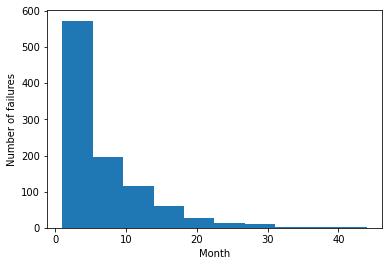

In [6]:
plt.hist(values)
plt.xlabel('Month')
plt.ylabel('Number of failures')
plt.show()

In [7]:
i = 0
EFN = []
EFD = []

for value in values:
    if i == 0:
        delta_t = values.count(i)
        n = delta_t
        R = (iterations - n)/iterations
        EFN.append(R)
        F = 1 - R
        EFD.append(F)
        i += 1
    elif i > 0:
        delta_t = values.count(i)
        n += delta_t
        R = (iterations - n) / iterations
        EFN.append(R)
        F = 1 - R
        EFD.append(F)
        i += 1

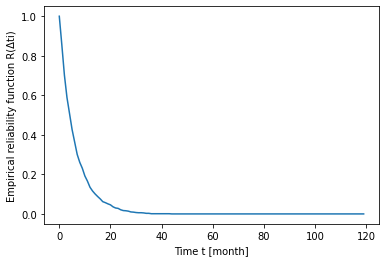

In [8]:
plt.plot(EFN[0:number])
plt.xlabel('Time t [month]')
plt.ylabel('Empirical reliability function R(\u0394ti)')
plt.show()

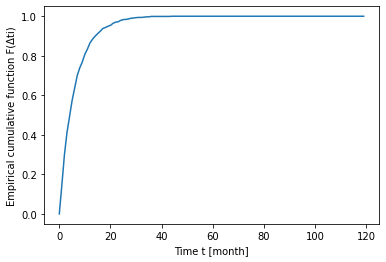

In [9]:
plt.plot(EFD[0:number])
plt.xlabel('Time t [month]')
plt.ylabel('Empirical cumulative function F(\u0394ti)')
plt.show()